<a href="https://colab.research.google.com/github/ikp-773/MRI-PD-Detection/blob/5-Slice/Sliced_MRI_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_dir = '/content/drive/MyDrive/sliced_mri_dataset'

X = []
y = []

img_size=(256, 256)

for label, folder_name in enumerate(['control', 'parkinson']):
    folder_path = os.path.join(data_dir, folder_name)
    for subject in os.listdir(folder_path):
        subject_path = os.path.join(folder_path, subject)
        slices = []
        for img_name in sorted(os.listdir(subject_path)):
            img_path = os.path.join(subject_path, img_name)
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size, color_mode='grayscale')
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            slices.append(img_array)
        slices = np.stack(slices, axis=0)
        X.append(slices)
        y.append(label)

X = np.array(X)
y = np.array(y)

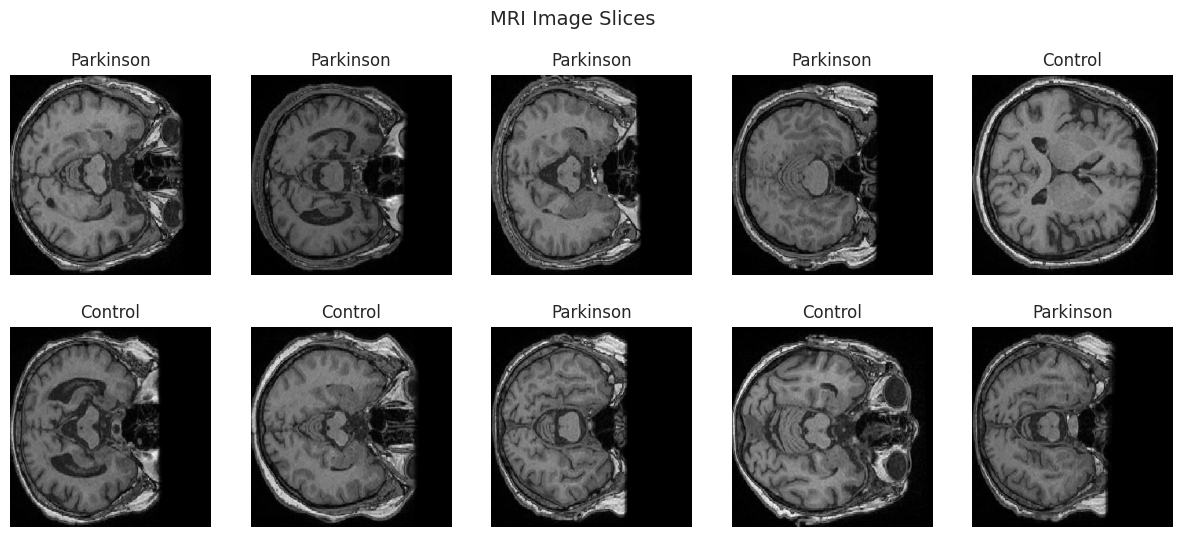

In [4]:
import seaborn as sns

sns.set_style("white")

def visualize_random_slices(X, y, rows=2, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
    fig.suptitle('MRI Image Slices', fontsize=14)
    for i in range(rows):
        for j in range(cols):
            index = np.random.randint(len(X))
            slice_index = np.random.randint(X.shape[1])
            axes[i, j].imshow(X[index, slice_index, :, :, 0], cmap='gray')
            axes[i, j].set_title('Control' if y[index] == 0 else 'Parkinson')
            axes[i, j].axis('off')
    plt.show()

visualize_random_slices(X, y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
input_shape = X_train.shape[1:]

print(input_shape)

model = Sequential()

model.add(Conv3D(32, kernel_size=(2, 2, 2), activation='relu', input_shape=input_shape))
model.add(MaxPooling3D(pool_size=(1, 2, 3)))
model.add(BatchNormalization())

model.add(Conv3D(64, kernel_size=(2, 2, 2), activation='relu'))
model.add(MaxPooling3D(pool_size=(1, 2, 2)))
model.add(BatchNormalization())

model.add(Conv3D(128, kernel_size=(2, 2, 2), activation='relu'))
model.add(MaxPooling3D(pool_size=(1, 2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

(5, 256, 256, 1)


In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_3 (Conv3D)           (None, 4, 255, 255, 32)   288       
                                                                 
 max_pooling3d_3 (MaxPooling  (None, 4, 127, 85, 32)   0         
 3D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 4, 127, 85, 32)   128       
 hNormalization)                                                 
                                                                 
 conv3d_4 (Conv3D)           (None, 3, 126, 84, 64)    16448     
                                                                 
 max_pooling3d_4 (MaxPooling  (None, 3, 63, 42, 64)    0         
 3D)                                                             
                                                      

In [10]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=32, batch_size=4)


Epoch 1/32
9/9 [==============================] - 71s 8s/step - loss: 21.1928 - accuracy: 0.4118 - val_loss: 0.7000 - val_accuracy: 0.4444
Epoch 2/32
9/9 [==============================] - 67s 7s/step - loss: 1.6005 - accuracy: 0.7353 - val_loss: 2.1175 - val_accuracy: 0.3333
Epoch 4/32
9/9 [==============================] - 65s 7s/step - loss: 4.5788 - accuracy: 0.7647 - val_loss: 0.7991 - val_accuracy: 0.2222
Epoch 5/32
9/9 [==============================] - 65s 7s/step - loss: 3.9331 - accuracy: 0.8235 - val_loss: 3.0032 - val_accuracy: 0.6667
Epoch 6/32
9/9 [==============================] - 71s 7s/step - loss: 13.8573 - accuracy: 0.6176 - val_loss: 3.7304 - val_accuracy: 0.6667
Epoch 7/32
9/9 [==============================] - 68s 8s/step - loss: 1.6070 - accuracy: 0.9118 - val_loss: 5.9465 - val_accuracy: 0.6667
Epoch 8/32
9/9 [==============================] - 63s 7s/step - loss: 0.6125 - accuracy: 0.9706 - val_loss: 6.1628 - val_accuracy: 0.6667
Epoch 9/32
9/9 [================

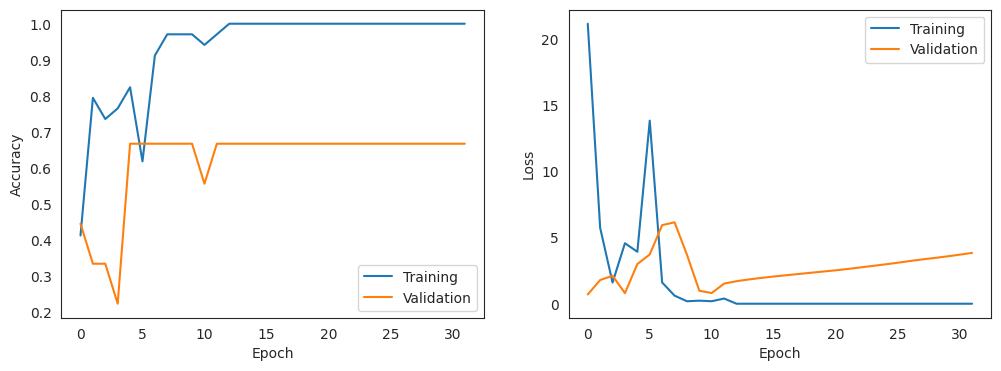

In [11]:

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

resnet, googlenet, inception

In [12]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", accuracy)

1/1 [==============================] - 2s 2s/step - loss: 3.8463 - accuracy: 0.6667
Test accuracy: 0.6666666865348816


In [13]:
model.save('/content/drive/MyDrive/slice_mri_model')

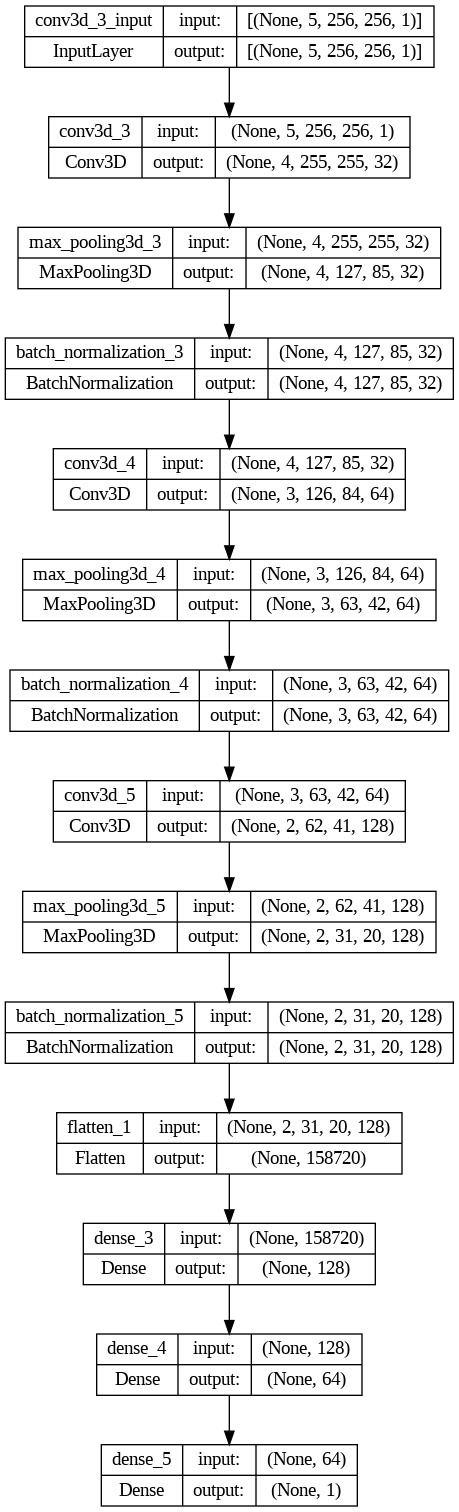

In [14]:
from keras.utils import plot_model

plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)